# Inserting all the Important Libraries 

In [3]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon
stop_words = stopwords.words("english")
from nltk.stem.snowball import SnowballStemmer
sn_stemmer = SnowballStemmer("english")
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
my_reviews_dataset = pd.read_csv('Reviews_Dataset.csv')

In [5]:
my_reviews_dataset

,Rating,Reviews
0,2,Great CD
1,2,One of the best game music soundtracks - for a...
2,1,Batteries died within a year ...
3,2,"works fine, but Maha Energy is better"
4,2,Great for the non-audiophile
...,...,...
9995,2,Really Enjoyed it!
9996,1,Disappointing PC interface/software
9997,2,Love it Love it Love it
9998,1,Faulty leg causing distress for my baby


# Cleaning the Text 

In [6]:
def function(x):
    x = str(x)
    x = x.lower()
    y=nltk.word_tokenize(x)
    temp=[]
    for i in y:
        if i in stopwords.words("english"): 
             pass
        else:
             temp.append(i)
    stop=' '.join(temp)
    
    c=nltk.word_tokenize(stop)
    temp2=[]
    for i in c:
        temp2.append((sn_stemmer.stem(i)))
    lem=' '.join(temp2)

    temp4 = []
    for i in lem:
        if i.isdigit():
            pass
        else:
            temp4.append(i)
    num =''.join(temp4)
    return num

In [7]:
function('LM10 is gifted, CR7 is hardwork')

'lm gift , cr hardwork'

In [8]:
my_reviews_dataset['Cleansed_Message'] = my_reviews_dataset['Reviews'].apply(function)

In [9]:
my_reviews_dataset

,Rating,Reviews,Cleansed_Message
0,2,Great CD,great cd
1,2,One of the best game music soundtracks - for a...,one best game music soundtrack - game n't real...
2,1,Batteries died within a year ...,batteri die within year ...
3,2,"works fine, but Maha Energy is better","work fine , maha energi better"
4,2,Great for the non-audiophile,great non-audiophil
...,...,...,...
9995,2,Really Enjoyed it!,realli enjoy !
9996,1,Disappointing PC interface/software,disappoint pc interface/softwar
9997,2,Love it Love it Love it,love love love
9998,1,Faulty leg causing distress for my baby,faulti leg caus distress babi


In [10]:
pos_words = set(opinion_lexicon.positive())

In [11]:
neg_words = set(opinion_lexicon.negative())

In [12]:
pos_words

{'deserving',
 'galore',
 'defeats',
 'dextrous',
 'grandeur',
 'fruitful',
 'glowing',
 'gloriously',
 'innovation',
 'eminence',
 'avid',
 'groundbreaking',
 'playfully',
 'reconcile',
 'restructured',
 'noble',
 'influential',
 'crisp',
 'bountiful',
 'trustingly',
 'realizable',
 'supports',
 'trump',
 'dumbfounding',
 'lyrical',
 'extoll',
 'outstandingly',
 'superior',
 'notably',
 'promise',
 'ilu',
 'spellbinding',
 'brilliantly',
 'significant',
 'slick',
 'fairly',
 'traction',
 'wonderous',
 'endorsing',
 'problem-solver',
 'solicitously',
 'inpressed',
 'self-sufficiency',
 'jaw-dropping',
 'faithful',
 'attractively',
 'affectation',
 'empathize',
 'ambitiously',
 'rectification',
 'astonishing',
 'fondly',
 'propitious',
 'fine',
 'tender',
 'expansive',
 'envy',
 'lifesaver',
 'integral',
 'vouch',
 'plush',
 'brighter',
 'poeticize',
 'durable',
 'protective',
 'proper',
 'benefit',
 'originality',
 'ultra-crisp',
 'wholesome',
 'win',
 'productive',
 'refreshed',
 'pro

# Calculating the Sentiment Score


In [13]:
def function2(t):
    s=nltk.word_tokenize(t)
    temp = []
    for i in s:
        if i in pos_words:
            temp.append(1)
        elif i in neg_words:
            temp.append(-1)
        else:
            temp.append(0)
    if len(temp) == 0:
        s = 0
    else:
        s = (sum(temp)/len(temp))
    return s

In [14]:
function2('good bad sad excellent nice awesome')

0.3333333333333333

In [15]:
my_reviews_dataset['Sentiment_Score'] = my_reviews_dataset['Cleansed_Message'].apply(function2)

In [16]:
my_reviews_dataset

,Rating,Reviews,Cleansed_Message,Sentiment_Score
0,2,Great CD,great cd,0.500000
1,2,One of the best game music soundtracks - for a...,one best game music soundtrack - game n't real...,0.100000
2,1,Batteries died within a year ...,batteri die within year ...,-0.200000
3,2,"works fine, but Maha Energy is better","work fine , maha energi better",0.500000
4,2,Great for the non-audiophile,great non-audiophil,0.500000
...,...,...,...,...
9995,2,Really Enjoyed it!,realli enjoy !,0.333333
9996,1,Disappointing PC interface/software,disappoint pc interface/softwar,-0.333333
9997,2,Love it Love it Love it,love love love,1.000000
9998,1,Faulty leg causing distress for my baby,faulti leg caus distress babi,-0.200000


# Categorizing the Sentiment Scores


In [17]:
def function3(w):
    temp = ''
    if w > 0:
        temp = 'Positive'
    elif w < 0:
        temp = 'Negative'
    else:
        temp = 'Positive'
    return temp

In [18]:
my_reviews_dataset['Sentiment'] = my_reviews_dataset['Sentiment_Score'].apply(function3)

In [19]:
my_reviews_dataset

,Rating,Reviews,Cleansed_Message,Sentiment_Score,Sentiment
0,2,Great CD,great cd,0.500000,Positive
1,2,One of the best game music soundtracks - for a...,one best game music soundtrack - game n't real...,0.100000,Positive
2,1,Batteries died within a year ...,batteri die within year ...,-0.200000,Negative
3,2,"works fine, but Maha Energy is better","work fine , maha energi better",0.500000,Positive
4,2,Great for the non-audiophile,great non-audiophil,0.500000,Positive
...,...,...,...,...,...
9995,2,Really Enjoyed it!,realli enjoy !,0.333333,Positive
9996,1,Disappointing PC interface/software,disappoint pc interface/softwar,-0.333333,Negative
9997,2,Love it Love it Love it,love love love,1.000000,Positive
9998,1,Faulty leg causing distress for my baby,faulti leg caus distress babi,-0.200000,Negative


In [20]:
my_reviews_dataset['Sentiment'].value_counts()

Positive    8308
Negative    1692
Name: Sentiment, dtype: int64

<AxesSubplot:>

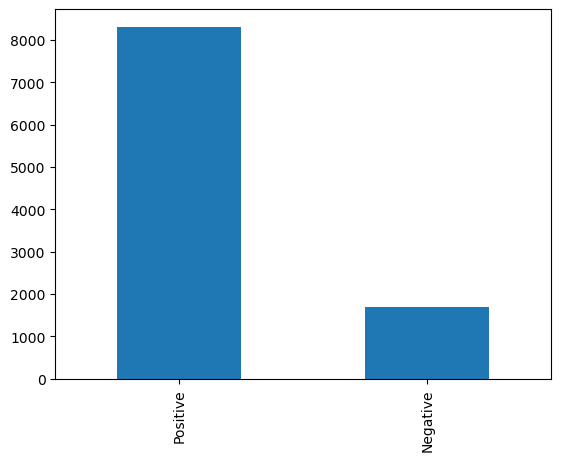

In [21]:
my_reviews_dataset['Sentiment'].value_counts().plot(kind='bar')

# Evaluating the Model's Accuracy

In [22]:
#Storing text in a variable
mrd_x = my_reviews_dataset['Cleansed_Message']

In [23]:
#Storing text sentiment in a variable
mrd_y = my_reviews_dataset['Sentiment']

In [24]:
#Selectig the train and test size
X_train, X_test, y_train, y_test = train_test_split(mrd_x, mrd_y, test_size=0.30, random_state=20)

In [25]:
X_train

8094                                         workmanship
1008                                       materi flimsi
8016                           good thought , one best .
1964             's heat plate grow rusti within month .
9844    live drum , live trumpet , live bass , live funk
                              ...                       
3915                                prequel flower attic
9620                                               sad !
7068                                      funnier expect
7391                                             statist
4367                                             problem
Name: Cleansed_Message, Length: 7000, dtype: object

In [26]:
X_test

9957          anoth fine tale mcmurtri
1687    best yoga video kid age & abil
2116                one best book time
231                   american treasur
2780             morey ignor literatur
                     ...              
2210                            im jim
2141             everi sinc saw one tv
1036             well made extrem skew
8987                     great qualiti
981            switch goal - good movi
Name: Cleansed_Message, Length: 3000, dtype: object

In [27]:
y_train

8094    Positive
1008    Positive
8016    Positive
1964    Positive
9844    Positive
          ...   
3915    Positive
9620    Negative
7068    Positive
7391    Positive
4367    Negative
Name: Sentiment, Length: 7000, dtype: object

In [28]:
y_test

9957    Positive
1687    Positive
2116    Positive
231     Positive
2780    Positive
          ...   
2210    Positive
2141    Positive
1036    Positive
8987    Positive
981     Positive
Name: Sentiment, Length: 3000, dtype: object

# Vectorizing X_train and X_test

In [29]:
#Splitting on the data and initialising the vectors
vectorizer = CountVectorizer()

In [30]:
#fitting X_train in vectorizer
vectorizer.fit(X_train)

CountVectorizer()

In [31]:
#transforming X_train
vectorizer.transform(X_train)

<7000x4892 sparse matrix of type '<class 'numpy.int64'>'
	with 19512 stored elements in Compressed Sparse Row format>

In [32]:
#Storing the transferred vector in a variable
X_train_vector = vectorizer.transform(X_train)

In [33]:
X_test_vector = vectorizer.transform(X_test)

# Encoding the Categories


In [34]:
#Importing Label Encoder and initialising it
LE = LabelEncoder()

In [35]:
#Fitting y_train into the encoder
LE.fit(y_train)

LabelEncoder()

In [36]:
LE.classes_

array(['Negative', 'Positive'], dtype=object)

In [37]:
#Transforming y_train
LE.transform(y_train)

array([1, 1, 1, ..., 1, 1, 0])

In [38]:
#Storing the transferred vector in a variable
y_train_encoded = LE.transform(y_train)

In [39]:
y_test_encoded = LE.transform(y_test)

# Training the Model after Categorizing
- X_train_vector
- X_test_vector
- y_train_encoded
- y_test_encoded

In [40]:
#Fitting the model
LR=LogisticRegression()

In [41]:
#Fitting th model
LR_model = LR.fit(X_train_vector,y_train_encoded)

In [42]:
#Predicting the model
LR.predict(X_test_vector)

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
#Storing the prediction in a variable
LR_model_predicted = LR.predict(X_test_vector)

In [47]:
y_test_encoded

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
test_text = ["Cristiano Ronaldo is the Greatest"]

In [49]:
#Vectorizing the text
vectorizer.transform(test_text)

<1x4892 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [50]:
#Storing the vector in a variable
text_vector_pos = vectorizer.transform(test_text)

In [51]:
LE.inverse_transform([1])

array(['Positive'], dtype=object)

In [52]:
#Model's Prediction
LE.inverse_transform(LR.predict(text_vector_pos))

array(['Positive'], dtype=object)

# Model's Accuracy 

In [225]:
accuracy_score(y_test_encoded,LR_model_predicted)

0.939

# Confusion Matrix

In [179]:
#Storing the fitted values in a variable
cm_model = confusion_matrix(y_test_encoded,LR_model_predicted)

In [180]:
cm_model

array([[ 333,  163],
       [  20, 2484]])

<AxesSubplot:>

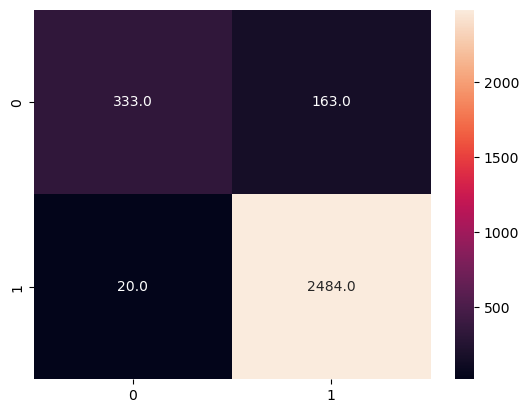

In [226]:
#Plotting the values in a heatmap
sns.heatmap(cm_model, annot=True, fmt=".1f")

# Clustering and Vectorizing 

In [183]:
#Storing Cleansed message in a variable
V = my_reviews_dataset['Cleansed_Message']

In [184]:
#Fitting it inside a variable
VECT = vectorizer.fit(V)

In [227]:
#Transforming X
x_vector = vectorizer.transform(V)

# Clustering

In [187]:
#Initialising
km = KMeans(n_clusters=3)

In [189]:
#Fitting the model
km_model = km.fit(x_vector)

In [190]:
x_km = km.predict(x_vector)

In [191]:
x_km [0:30]

array([0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [192]:
km_model.inertia_

27748.64070207681

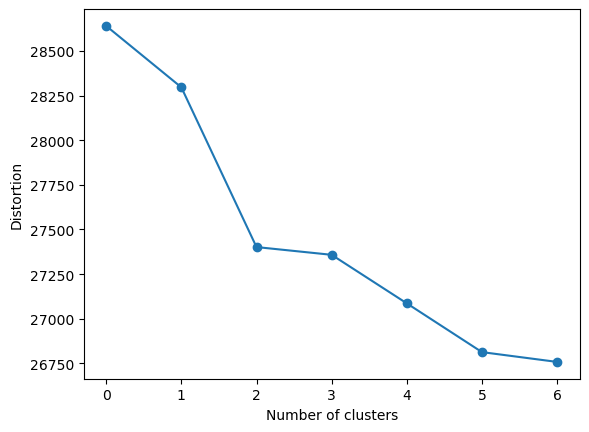

In [193]:
temp = []
for i in range(7):
    km = KMeans(n_clusters = i+1)
    km_model = km.fit(x_vector)
    output = km_model.inertia_
    temp.append(output)
    
plt.plot(range(7), temp, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [194]:
my_reviews_dataset['Clusters'] = x_km

In [195]:
my_reviews_dataset

,Rating,Reviews,Cleansed_Message,Sentiment_Score,Sentiment,Clusters
0,2,Great CD,great cd,0.500000,Positive,0
1,2,One of the best game music soundtracks - for a...,one best game music soundtrack - game n't real...,0.100000,Positive,1
2,1,Batteries died within a year ...,batteri die within year ...,-0.200000,Negative,1
3,2,"works fine, but Maha Energy is better","work fine , maha energi better",0.500000,Positive,2
4,2,Great for the non-audiophile,great non-audiophil,0.500000,Positive,0
...,...,...,...,...,...,...
9995,2,Really Enjoyed it!,realli enjoy !,0.333333,Positive,1
9996,1,Disappointing PC interface/software,disappoint pc interface/softwar,-0.333333,Negative,1
9997,2,Love it Love it Love it,love love love,1.000000,Positive,1
9998,1,Faulty leg causing distress for my baby,faulti leg caus distress babi,-0.200000,Negative,1


In [196]:
my_reviews_dataset['Clusters'].value_counts()

1    9136
0     667
2     197
Name: Clusters, dtype: int64

In [197]:
mrd_cluster_0 = my_reviews_dataset[my_reviews_dataset['Clusters'] == 0]

In [198]:
mrd_cluster_1 = my_reviews_dataset[my_reviews_dataset['Clusters'] == 1]

In [229]:
mrd_cluster_2 = my_reviews_dataset[my_reviews_dataset['Clusters'] == 2]

# converting the clusters into strings in order to create wordclouds

In [203]:
Cluster0 = str(mrd_cluster_0.values)

In [204]:
Cluster1 = str(mrd_cluster_1.values)

In [205]:
Cluster2 = str(mrd_cluster_2.values)

In [230]:
Cluster0

"[[2 'Great CD' 'great cd' 0.5 'Positive' 0]\n [2 'Great for the non-audiophile' 'great non-audiophil' 0.5 'Positive' 0]\n [2 'Great book for travelling Europe' 'great book travel europ' 0.25\n  'Positive' 0]\n ...\n [2 'Great ideas!!' 'great idea ! !' 0.25 'Positive' 0]\n [1 'Not great' 'great' 1.0 'Positive' 0]\n [2 'Gift for my Great Nephew in Texas' 'gift great nephew texa' 0.25\n  'Positive' 0]]"

# WordCloud for Cleansed Message

In [208]:
my_reviews_dataset['Cleansed_Message'].values

array(['great cd',
       "one best game music soundtrack - game n't realli play",
       'batteri die within year ...', ..., 'love love love',
       'faulti leg caus distress babi', 'fantast entertain'], dtype=object)

In [210]:
string = str(my_reviews_dataset['Cleansed_Message'].values)

In [211]:
my_reviews_dataset.shape

(10000, 6)

In [231]:
len(string)

173

## Showing the WordCloud codes as markdown due to error in installing WordCloud library in the terminal.

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords,background_color="black").generate(string)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Creating WordCloud for all the Clusters


# Cluster 1

wordcloud = WordCloud(stopwords = stopwords,background_color="black").generate(Cluster0)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Cluster 2


wordcloud = WordCloud(stopwords = stopwords,background_color="black").generate(Cluster1)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Cluster 3 


In [ ]:
wordcloud = WordCloud(stopwords = stopwords,background_color="black").generate(Cluster2)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Displayed the WordClouds on readme file.